In [1]:
import warnings
warnings.filterwarnings('ignore')
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Connect to MySQL
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='thanigai@1234',
    database='gamesales'
)

In [5]:
games = pd.read_sql("SELECT * FROM games", conn)

In [7]:
sales = pd.read_sql("SELECT * FROM vgsales", conn)

In [9]:
# Load datasets from MySQL
query_games = "SELECT * FROM games"
query_sales = "SELECT * FROM vgsales"

In [11]:
games = pd.read_sql(query_games, conn)
sales = pd.read_sql(query_sales, conn)

In [13]:
# Merge the datasets
merged_df = pd.merge(
    sales, games,
    left_on=["Rank"],
    right_on=["S.No"],
    how="inner"
)
merged_df.fillna(0, inplace=True)

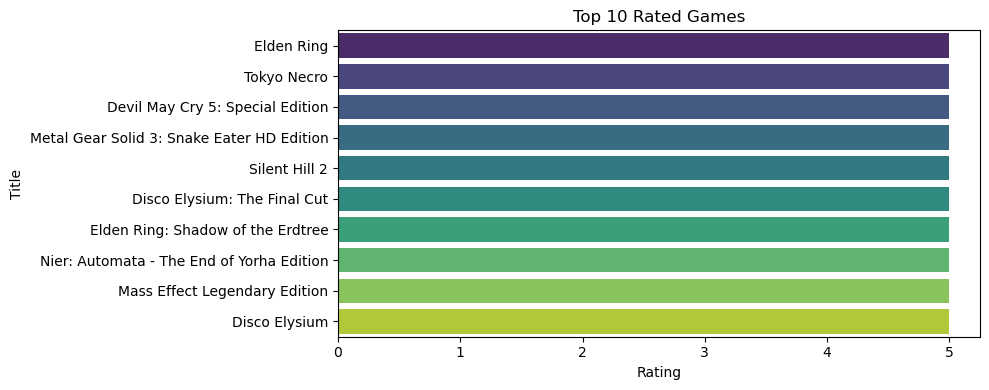

In [79]:
# 1. Top-rated games by user reviews
top_rated = games.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x='Rating', y='Title', data=top_rated, palette='viridis')
plt.title('Top 10 Rated Games')
plt.tight_layout()
plt.show()

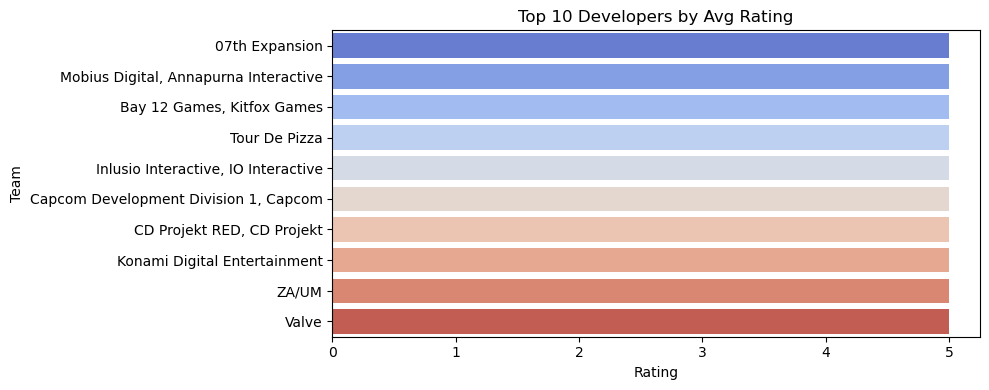

In [23]:
# 2. Developers (Teams) with highest average ratings
top_devs = games.groupby('Team')['Rating'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 4))
sns.barplot(x='Rating', y='Team', data=top_devs, palette='coolwarm')
plt.title('Top 10 Developers by Avg Rating')
plt.tight_layout()
plt.show()

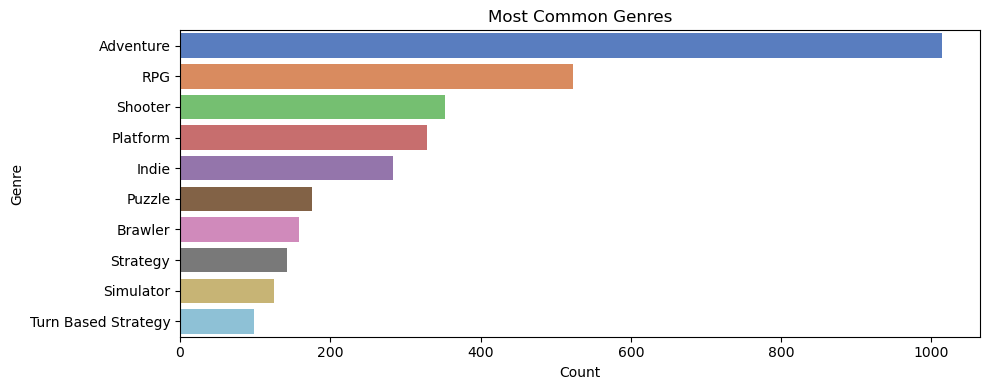

In [25]:
# 3. Most common genres
all_genres = games['Genres'].dropna().str.split(', ')
genre_counts = Counter([genre for sublist in all_genres for genre in sublist])
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)
plt.figure(figsize=(10, 4))
sns.barplot(x='Count', y='Genre', data=genre_df.head(10), palette='muted')
plt.title('Most Common Genres')
plt.tight_layout()
plt.show()

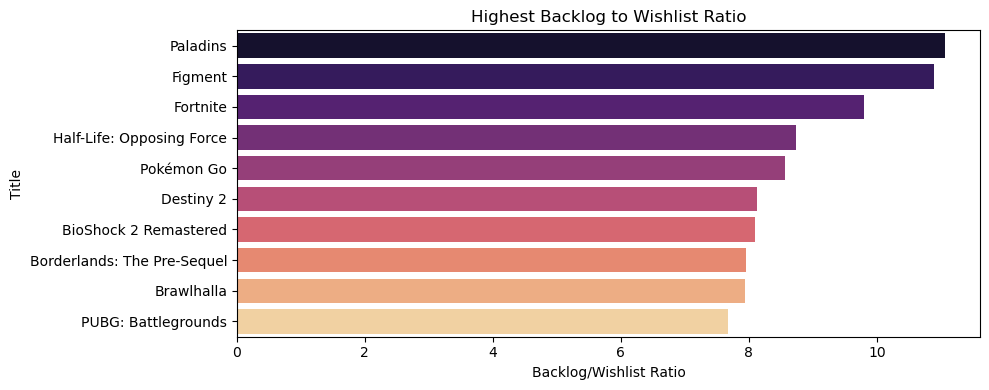

In [95]:
# 4. Games with highest backlog vs wishlist ratio
games['Backlog/Wishlist Ratio'] = games['Backlogs'] / (games['Wishlist'] + 1)
top_backlog_ratio = games.sort_values(by='Backlog/Wishlist Ratio', ascending=False).head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x='Backlog/Wishlist Ratio', y='Title', data=top_backlog_ratio, palette='magma')
plt.title('Highest Backlog to Wishlist Ratio')
plt.tight_layout()
plt.show()

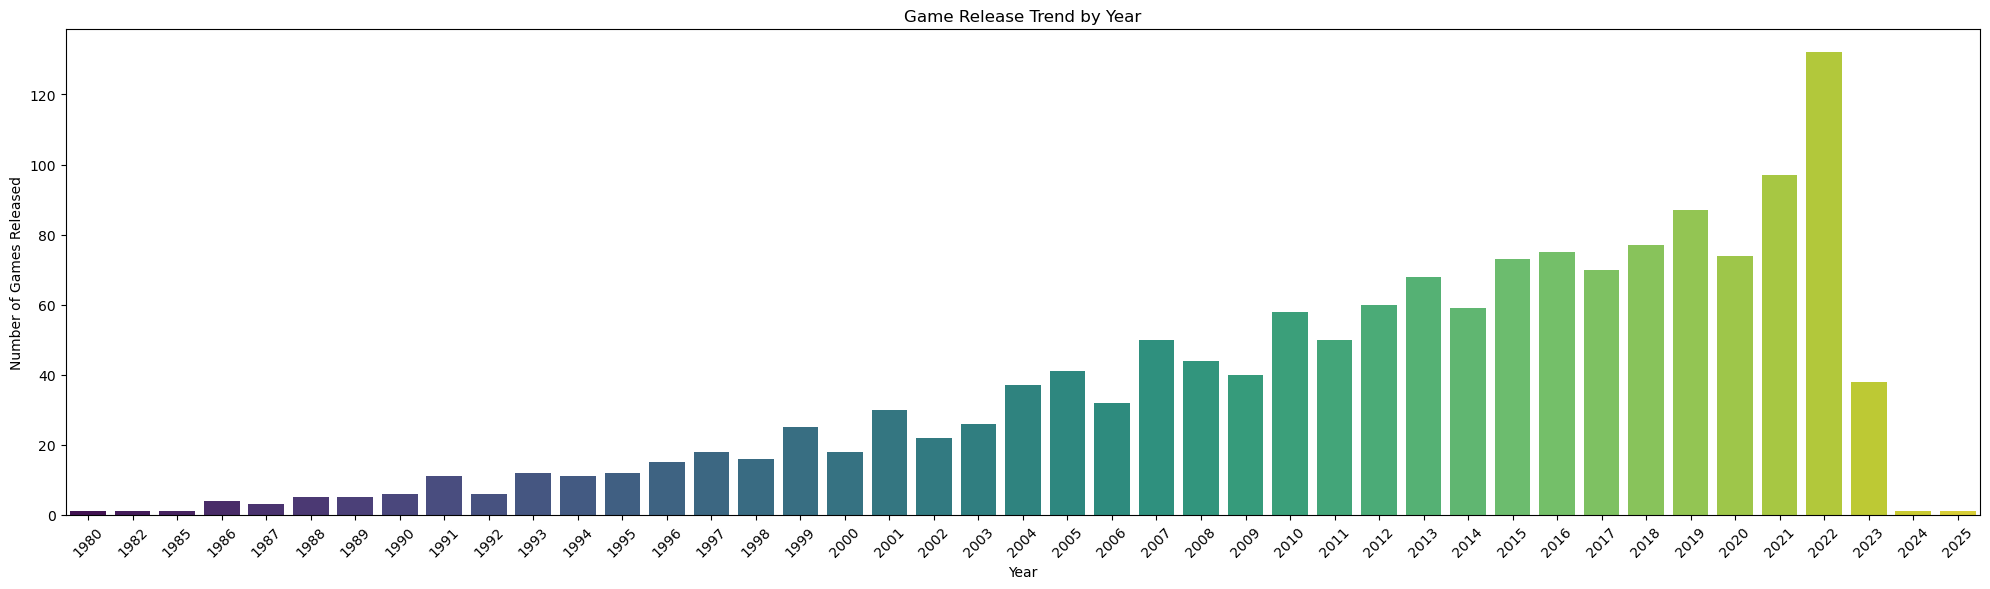

In [61]:
# 5 What is the game release trend across years?
games['Release_Date'] = pd.to_datetime(games['Release_Date'], errors='coerce')
games['Year'] = games['Release_Date'].dt.year
release_trend = games['Year'].dropna().value_counts().sort_index()

# Plotting as barplot
plt.figure(figsize=(20, 6))
sns.barplot(x=release_trend.index.astype(int), y=release_trend.values, palette='viridis')
plt.title('Game Release Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

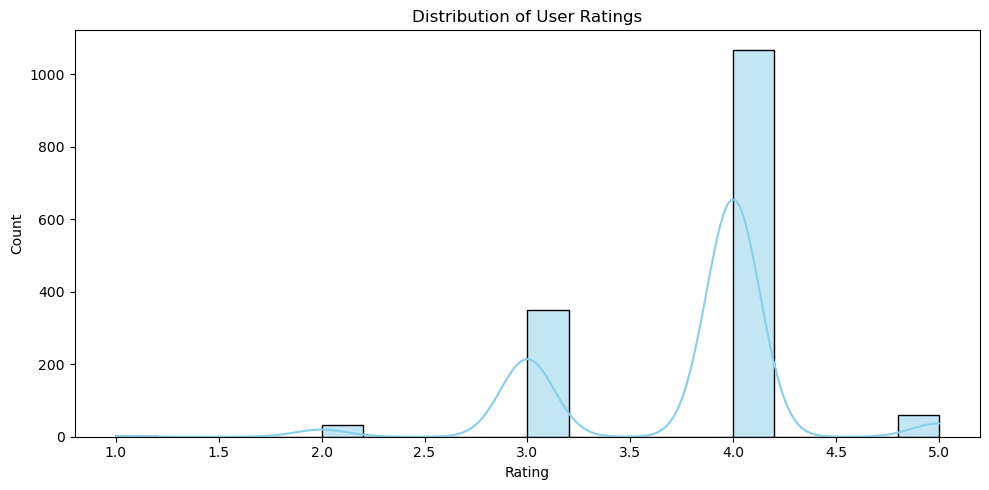

In [63]:
# 6. Distribution of user ratings
plt.figure(figsize=(10, 5))
sns.histplot(games['Rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of User Ratings')
plt.tight_layout()
plt.show()

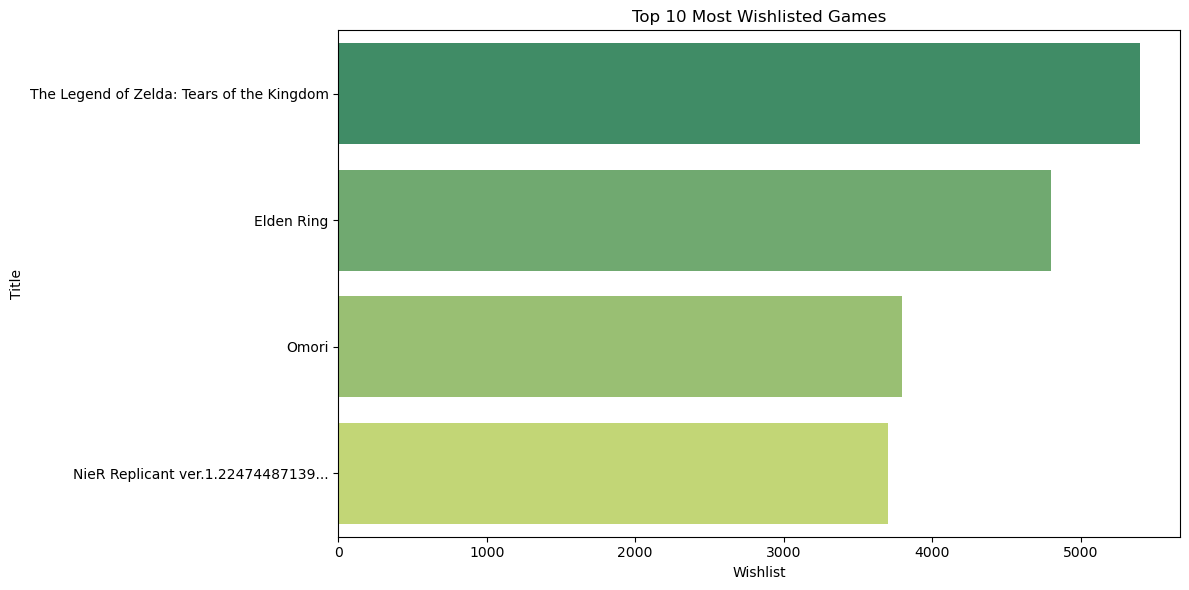

In [65]:
# 7. Top 10 most wishlisted games
top_wishlist = games.sort_values(by='Wishlist', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Wishlist', y='Title', data=top_wishlist, palette='summer')
plt.title('Top 10 Most Wishlisted Games')
plt.tight_layout()
plt.show()

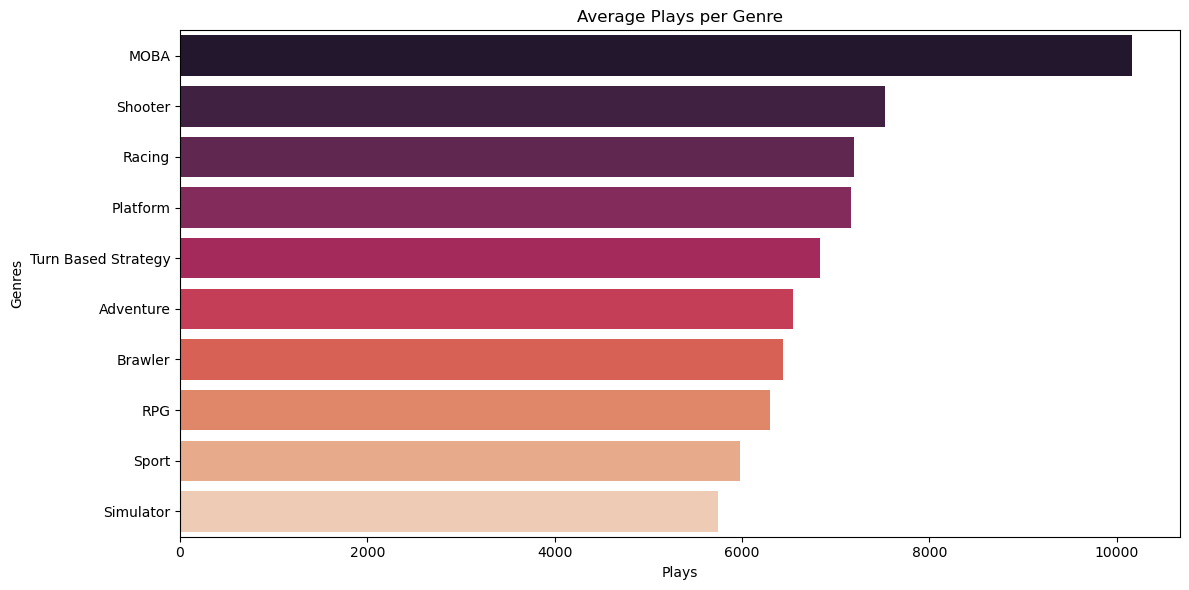

In [67]:
# 8. Average number of plays per genre
exploded = games.dropna(subset=['Genres', 'Plays']).copy()
exploded['Genres'] = exploded['Genres'].str.split(', ')
exploded = exploded.explode('Genres')
avg_plays = exploded.groupby('Genres')['Plays'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Plays', y='Genres', data=avg_plays.head(10), palette='rocket')
plt.title('Average Plays per Genre')
plt.tight_layout()
plt.show()

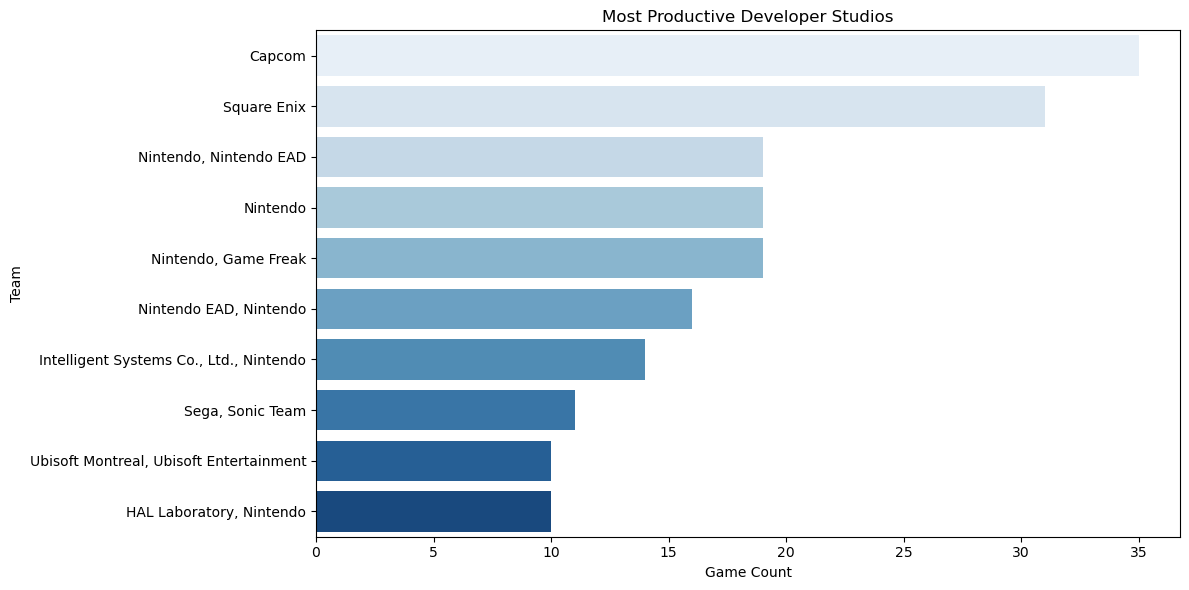

In [69]:
# 9. Most productive developers (by number of games)
prod = games['Team'].value_counts().head(10).reset_index()
prod.columns = ['Team', 'Game Count']
plt.figure(figsize=(12, 6))
sns.barplot(x='Game Count', y='Team', data=prod, palette='Blues')
plt.title('Most Productive Developer Studios')
plt.tight_layout()
plt.show()

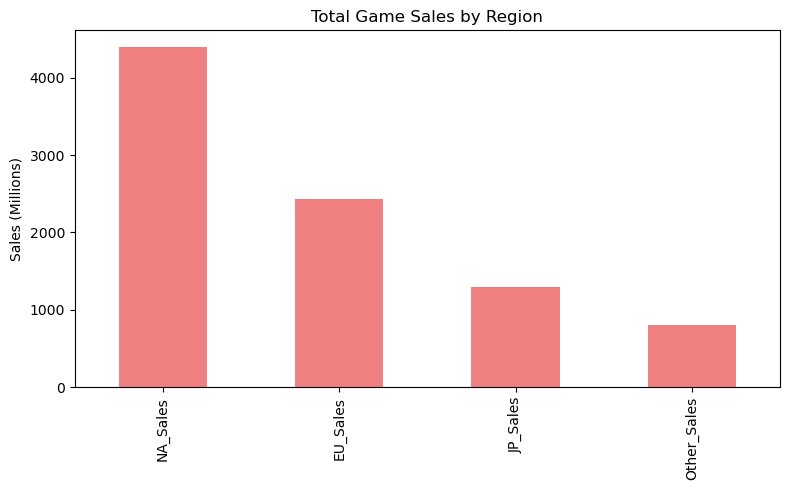

In [71]:
# 10. Which region generates the most game sales?
region_totals = sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(8, 5))
region_totals.plot(kind='bar', color='lightcoral')
plt.title('Total Game Sales by Region')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()

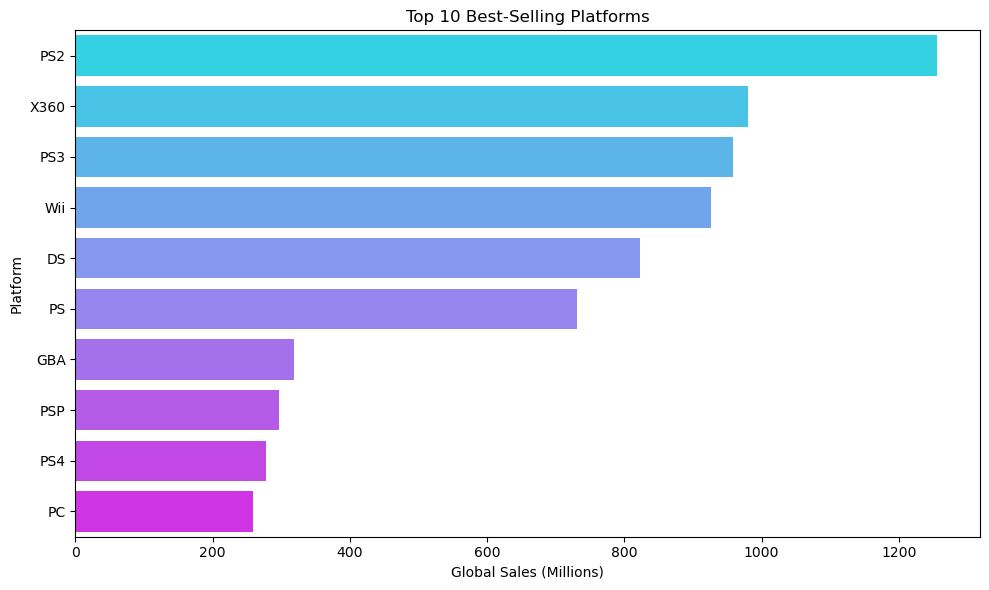

In [137]:
# 11. Best-selling platforms globally
platform_sales = sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Platform', data=platform_sales, palette='cool')
plt.title('Top 10 Best-Selling Platforms')
plt.xlabel('Global Sales (Millions)')
plt.tight_layout()
plt.show()

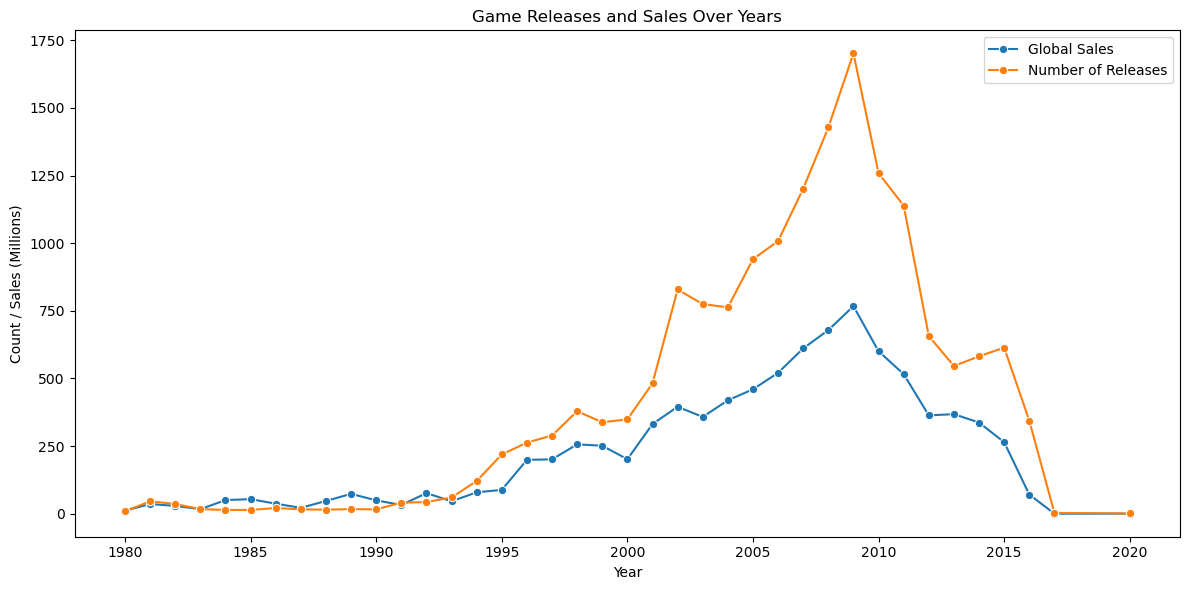

In [139]:
# 12. Game releases and sales trend over years
sales['Year'] = pd.to_numeric(sales['Year'], errors='coerce')
trend = sales.groupby('Year').agg({'Name': 'count', 'Global_Sales': 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Global_Sales', data=trend, label='Global Sales', marker='o')
sns.lineplot(x='Year', y='Name', data=trend, label='Number of Releases', marker='o')
plt.title('Game Releases and Sales Over Years')
plt.ylabel('Count / Sales (Millions)')
plt.tight_layout()
plt.show()

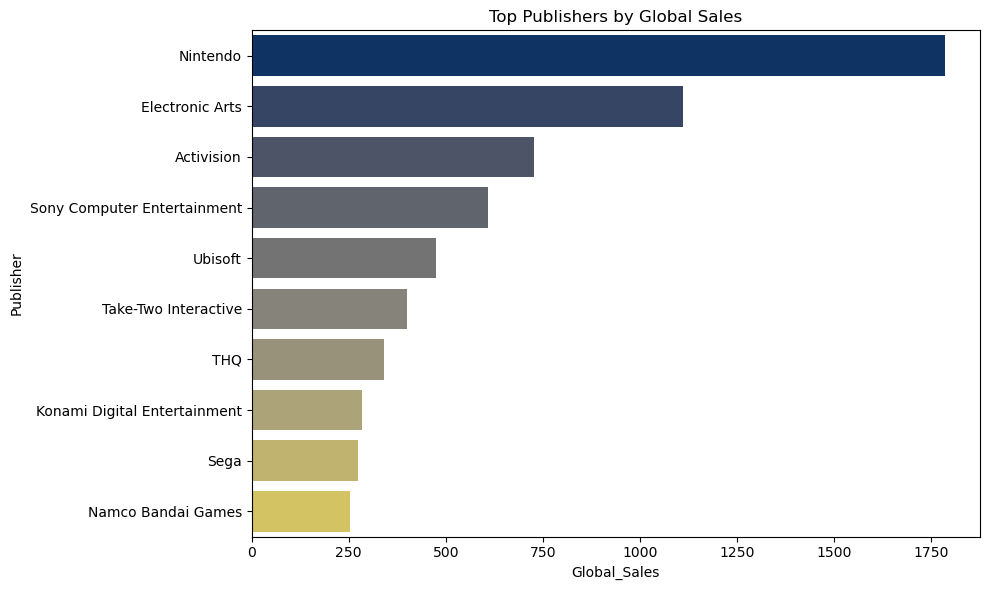

In [141]:
# 13. Top publishers by sales
top_publishers = sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Publisher', data=top_publishers, palette='cividis')
plt.title('Top Publishers by Global Sales')
plt.tight_layout()
plt.show()

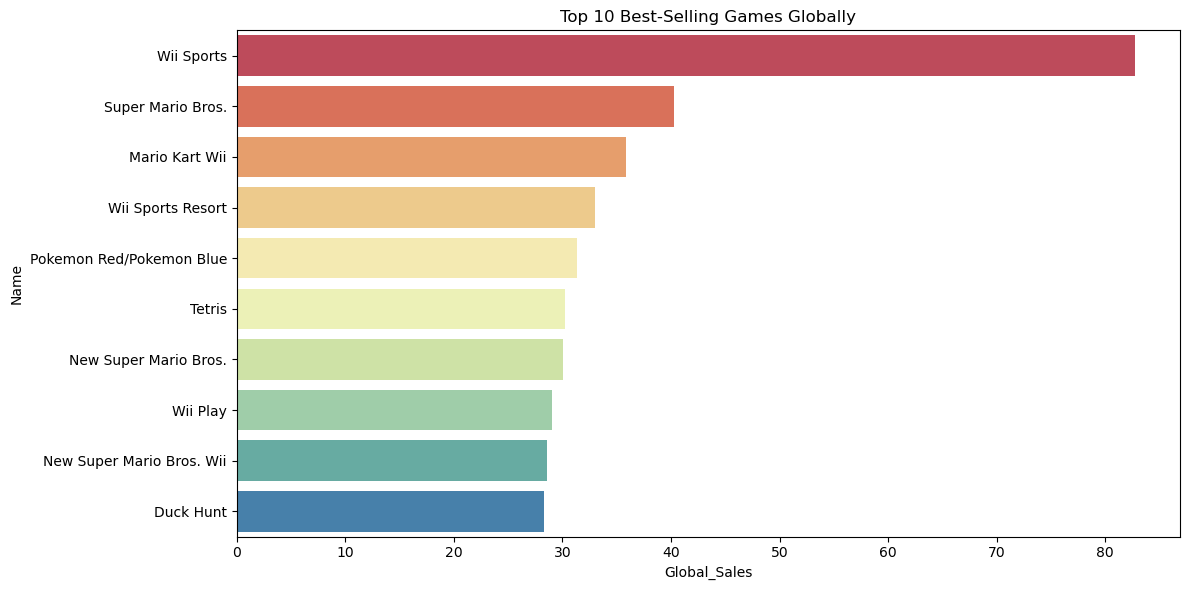

In [143]:
# 14. Top 10 best-selling games globally
top_games = sales.sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='Spectral')
plt.title('Top 10 Best-Selling Games Globally')
plt.tight_layout()
plt.show()

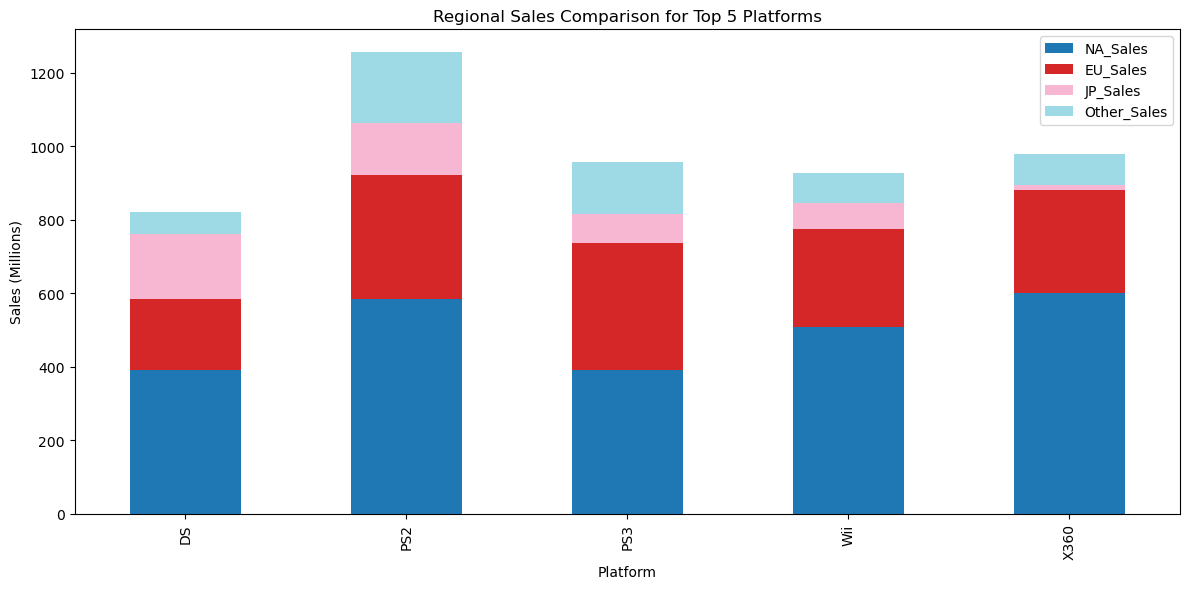

In [97]:
# 15. Regional sales comparison for top 5 platforms
top5_platforms = sales['Platform'].value_counts().head(5).index
regional = sales[sales['Platform'].isin(top5_platforms)]
regional_grouped = regional.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
regional_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Regional Sales Comparison for Top 5 Platforms')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()

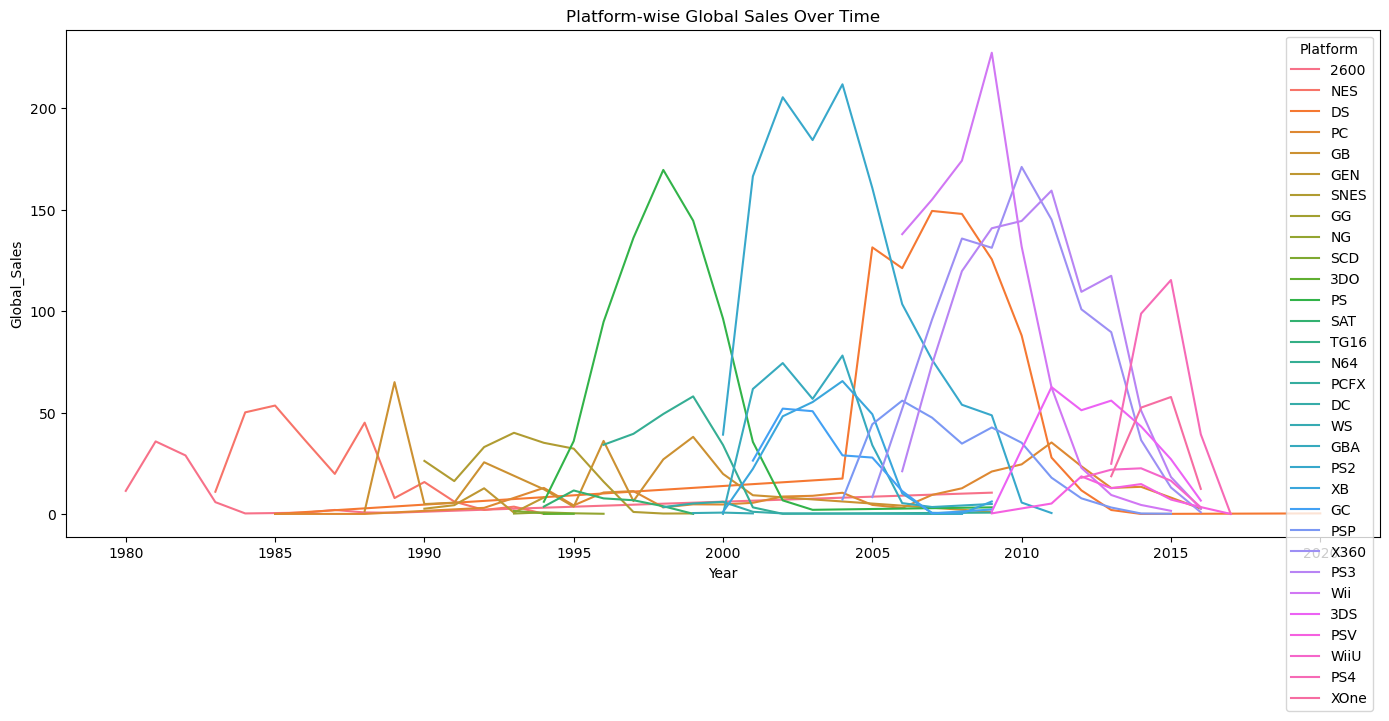

In [147]:
# 16. Market evolution by platform over time
evo = sales.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Global_Sales', hue='Platform', data=evo)
plt.title('Platform-wise Global Sales Over Time')
plt.tight_layout()
plt.show()

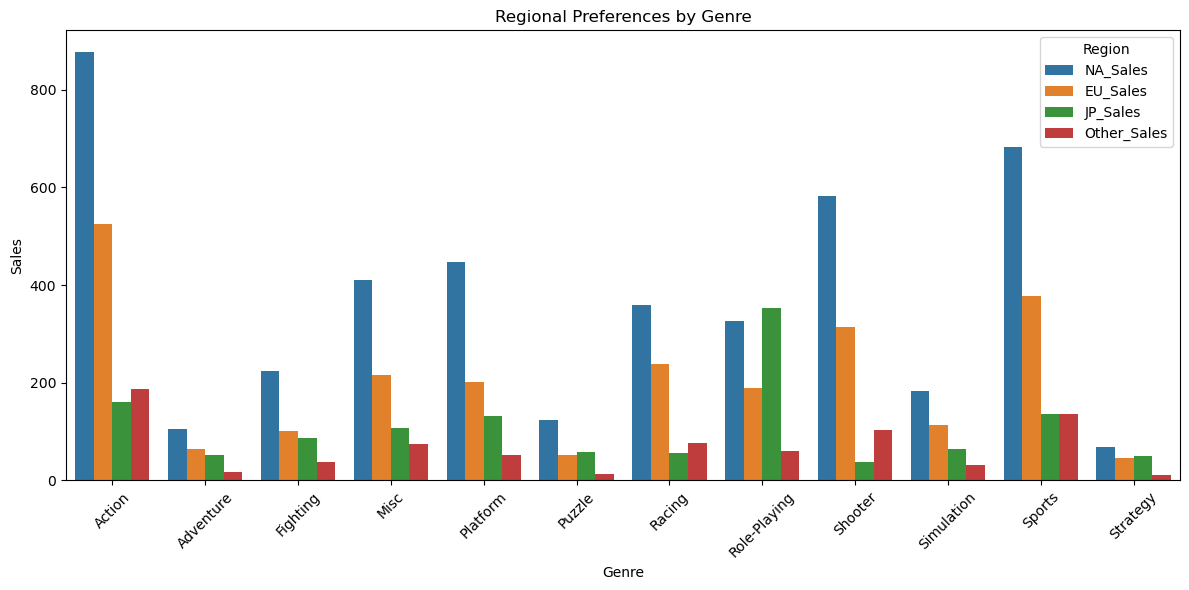

In [149]:
# 17. Regional genre preferences
region_genre = sales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
region_genre_melted = region_genre.melt(id_vars='Genre', var_name='Region', value_name='Sales')
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Sales', hue='Region', data=region_genre_melted)
plt.xticks(rotation=45)
plt.title('Regional Preferences by Genre')
plt.tight_layout()
plt.show()

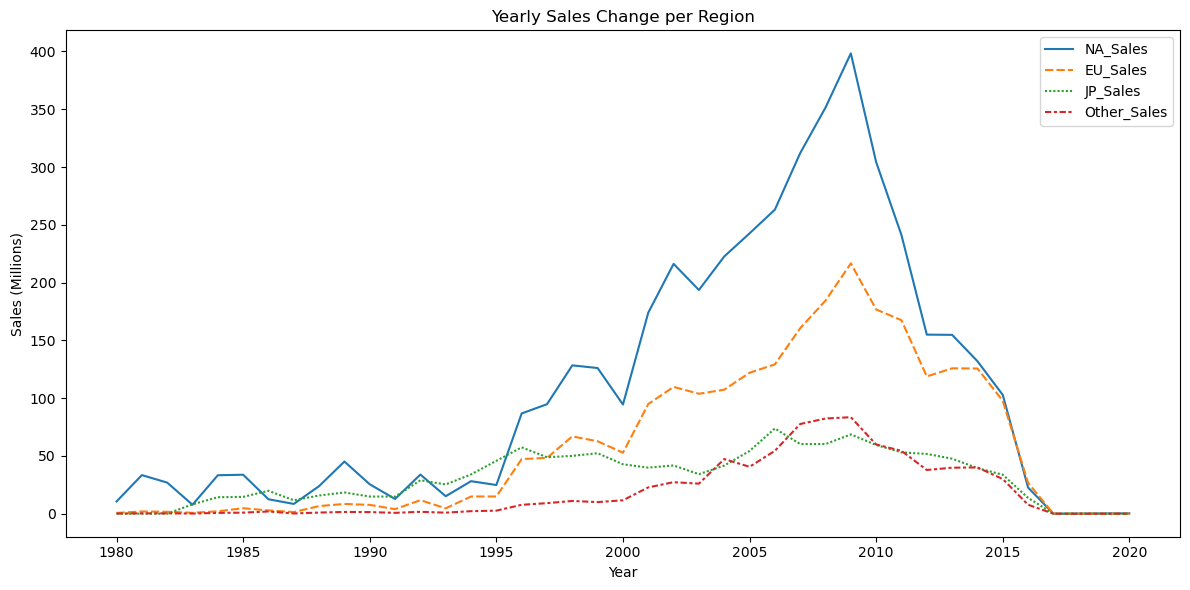

In [151]:
# 18. Yearly sales change per region
year_region = sales.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_region.set_index('Year'))
plt.title('Yearly Sales Change per Region')
plt.ylabel('Sales (Millions)')
plt.tight_layout()
plt.show()

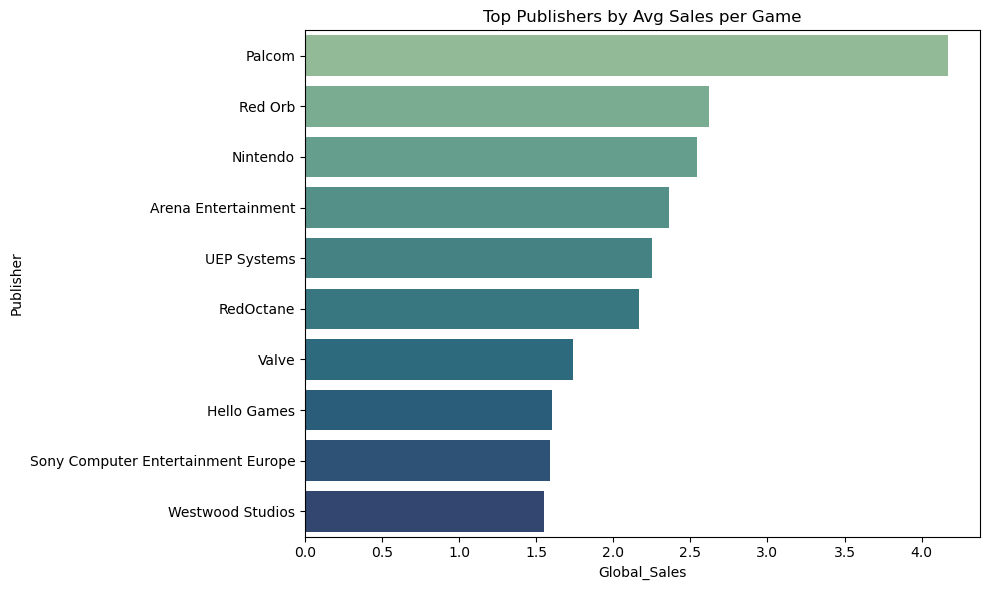

In [153]:
# 19. Average sales per publisher
avg_sales = sales.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Publisher', data=avg_sales, palette='crest')
plt.title('Top Publishers by Avg Sales per Game')
plt.tight_layout()
plt.show()

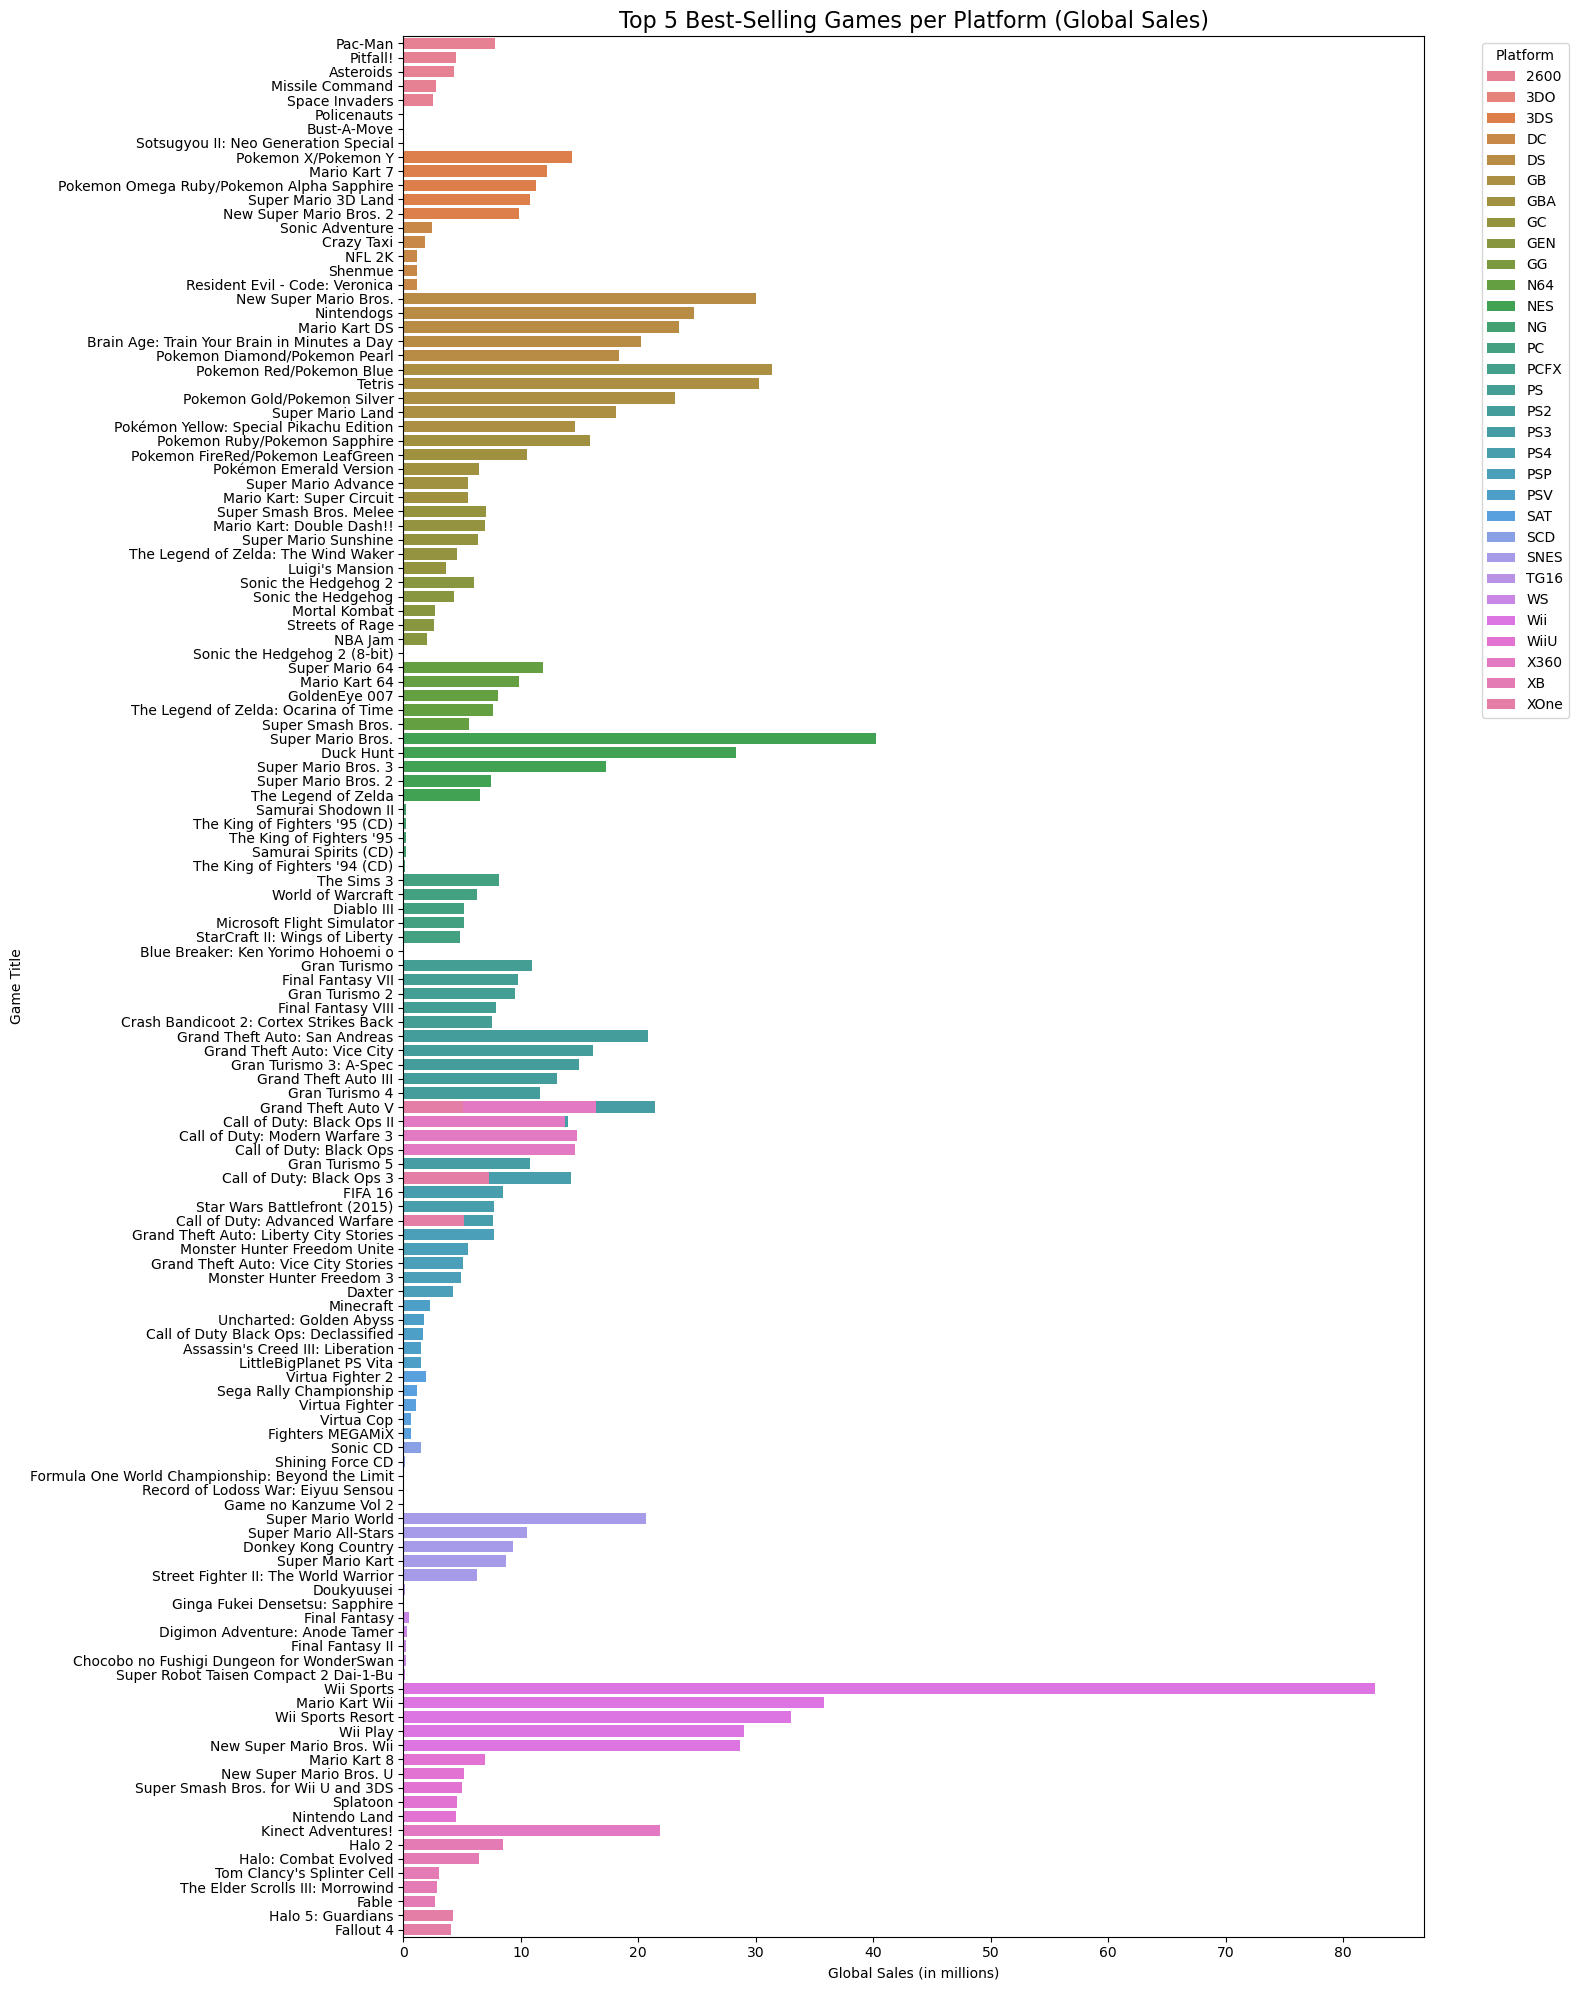

In [117]:
# 20. Top 5 best-selling games per platform
top5_games = sales.groupby('Platform').apply(lambda x: x.nlargest(5, 'Global_Sales')).reset_index(drop=True)

# Set the plot style
plt.figure(figsize=(16, 20))
sns.barplot(data=top5_games, x='Global_Sales', y='Name', hue='Platform', dodge=False)

# Formatting
plt.title('Top 5 Best-Selling Games per Platform (Global Sales)', fontsize=16)
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

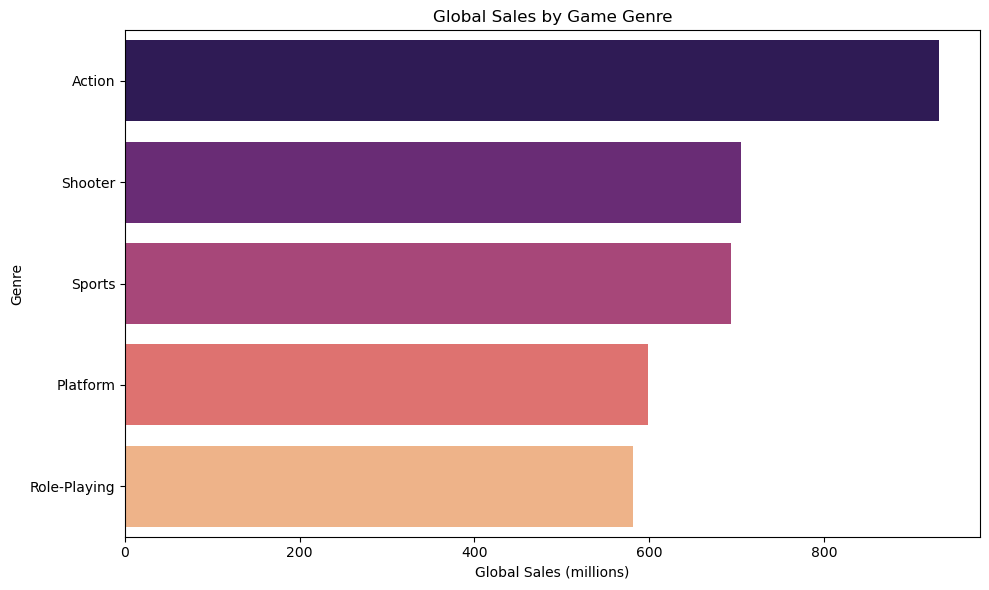

In [15]:
# 21. Which game genres generate the most global sales?
plt.figure(figsize=(10,6))
genre_sales = merged_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head()
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='magma')
plt.title("Global Sales by Game Genre")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

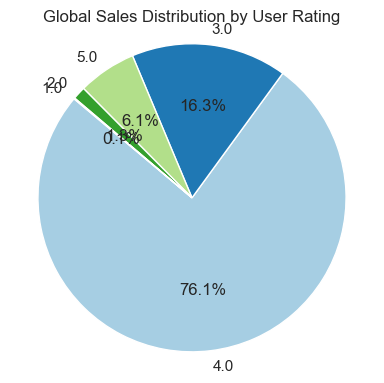

In [25]:
# 22. How does user rating affect global sales?
rating_sales = merged_df.groupby('Rating')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(4, 4))
plt.pie(rating_sales, labels=rating_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Global Sales Distribution by User Rating')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [29]:
# 23. Platforms with most games rated above 4
high_rating_platform_df = merged_df[merged_df["Rating"] > 4].groupby("Platform")["Rating"].count().sort_values(ascending=False).reset_index(name="High_Rated_Count")
print("\n🕹️ Platforms with Most Games Rating > 4")
print(high_rating_platform_df)


🕹️ Platforms with Most Games Rating > 4
   Platform  High_Rated_Count
0       PS2                11
1      X360                 8
2        GC                 6
3       PS3                 6
4        DS                 5
5       Wii                 5
6        PS                 4
7       PS4                 3
8       PSP                 3
9        GB                 2
10      GBA                 2
11      3DS                 1
12      N64                 1
13      NES                 1
14       PC                 1
15       XB                 1


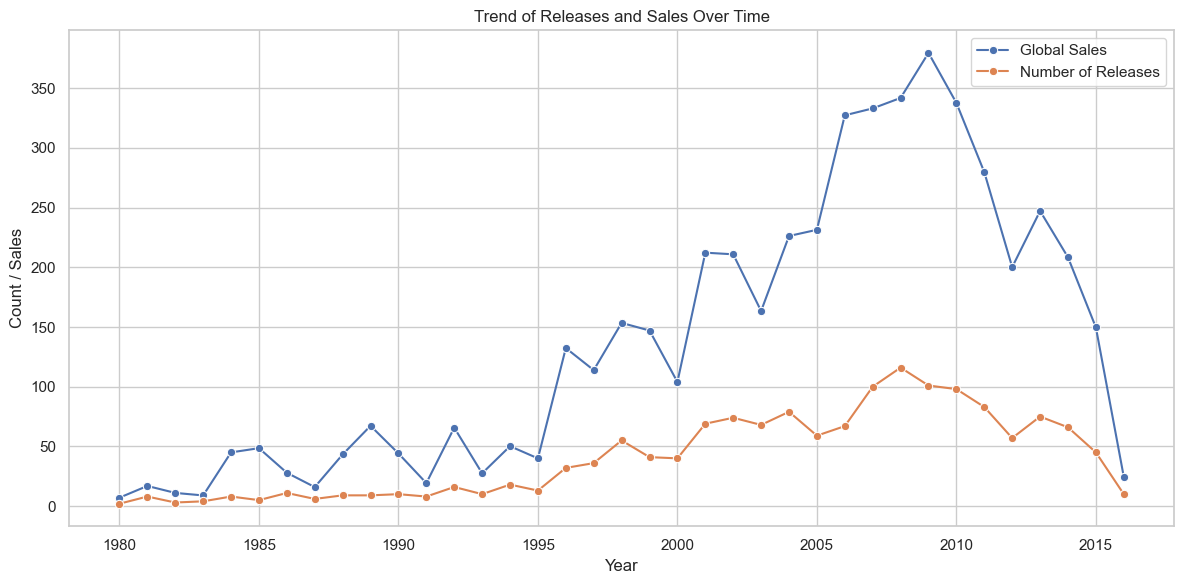

In [31]:
# 24. Trend of releases and sales over time
trend = merged_df.groupby('Year').agg({'Title':'count', 'Global_Sales':'sum'}).reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x='Year', y='Global_Sales', label='Global Sales', marker='o')
sns.lineplot(data=trend, x='Year', y='Title', label='Number of Releases', marker='o')
plt.title("Trend of Releases and Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Count / Sales")
plt.tight_layout()
plt.show()

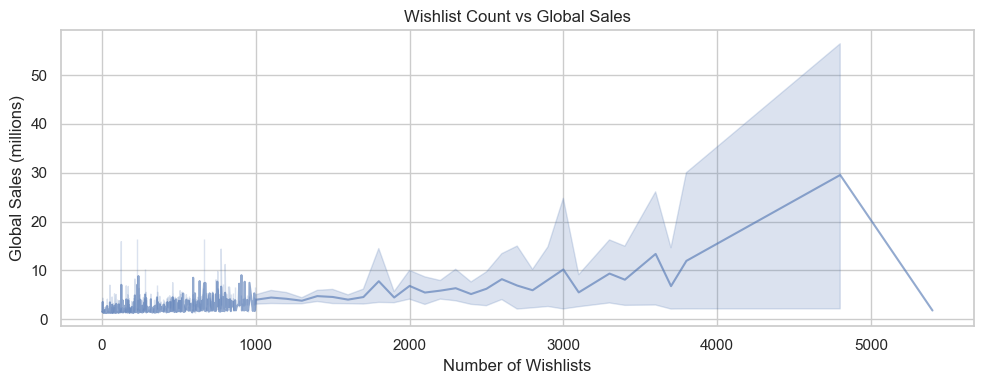

In [33]:
# 25. Do highly wishlisted games lead to more sales?
plt.figure(figsize=(10,4))
sns.lineplot(data=merged_df, x='Wishlist', y='Global_Sales', alpha=0.6)
plt.title("Wishlist Count vs Global Sales")
plt.xlabel("Number of Wishlists")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

In [105]:
# 26. Genres with highest engagement but lowest sales
merged_df["Engagement"] = merged_df["Plays"] + merged_df["Backlogs"] + merged_df["Wishlist"]
genre_engage_sales_df = merged_df.groupby("Genre")[["Engagement", "Global_Sales"]].mean().sort_values(by="Engagement", ascending=False).reset_index()
print("\n🎮 High Engagement, Low Sales by Genre")
print(genre_engage_sales_df)


🎮 High Engagement, Low Sales by Genre
          Genre  Engagement  Global_Sales
0        Racing     37600.0         35.82
1  Role-Playing     31600.0         31.37
2      Platform     30900.0         40.24
3        Sports     30550.0         57.87


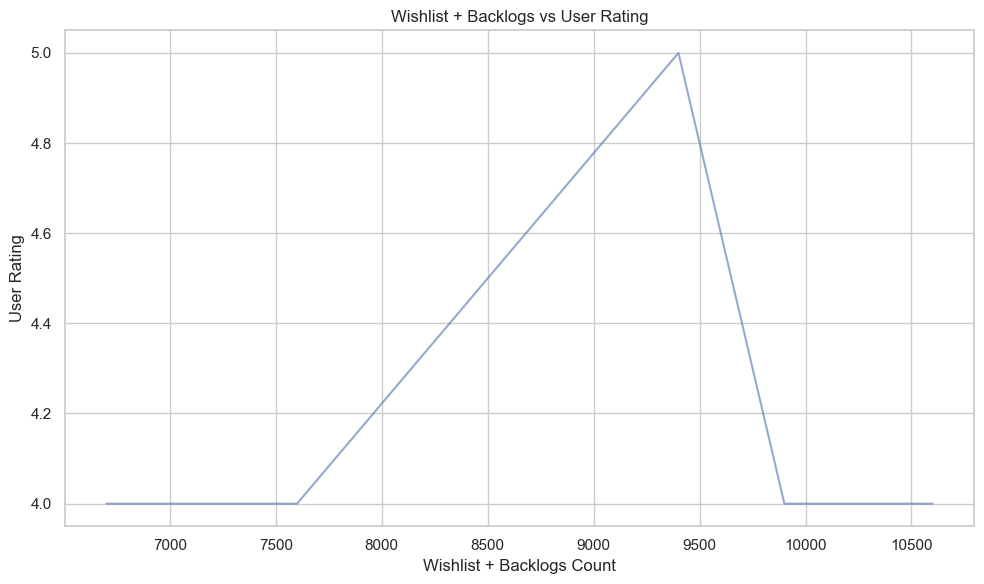

In [117]:
# 27. Correlation between wishlist/backlogs and ratings
plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df, x=merged_df['Wishlist'] + merged_df['Backlogs'], y='Rating', alpha=0.6)
plt.title("Wishlist + Backlogs vs User Rating")
plt.xlabel("Wishlist + Backlogs Count")
plt.ylabel("User Rating")
plt.tight_layout()
plt.show()

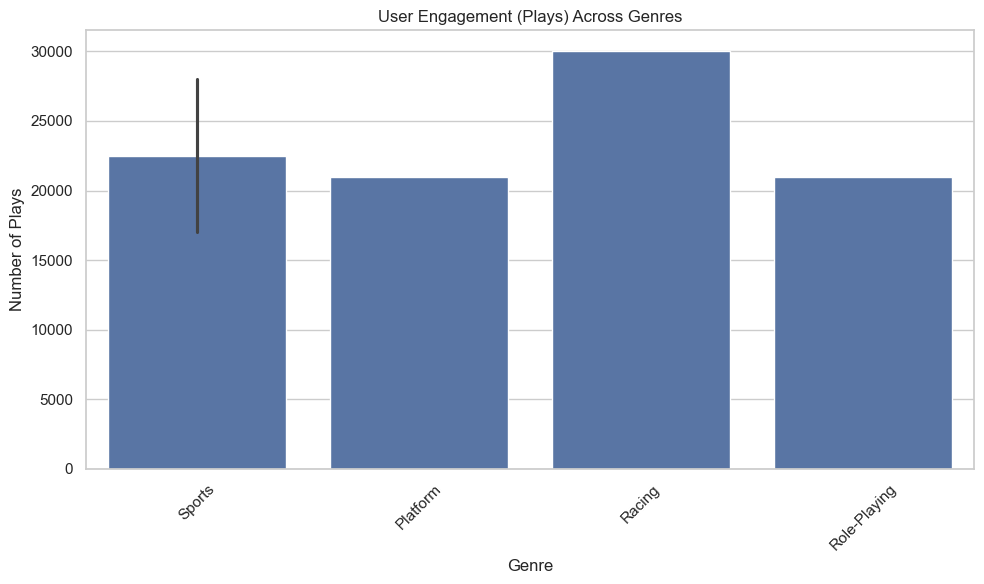

In [121]:
# 28. User engagement difference across genres
plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='Genre', y='Plays')
plt.title("User Engagement (Plays) Across Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Plays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

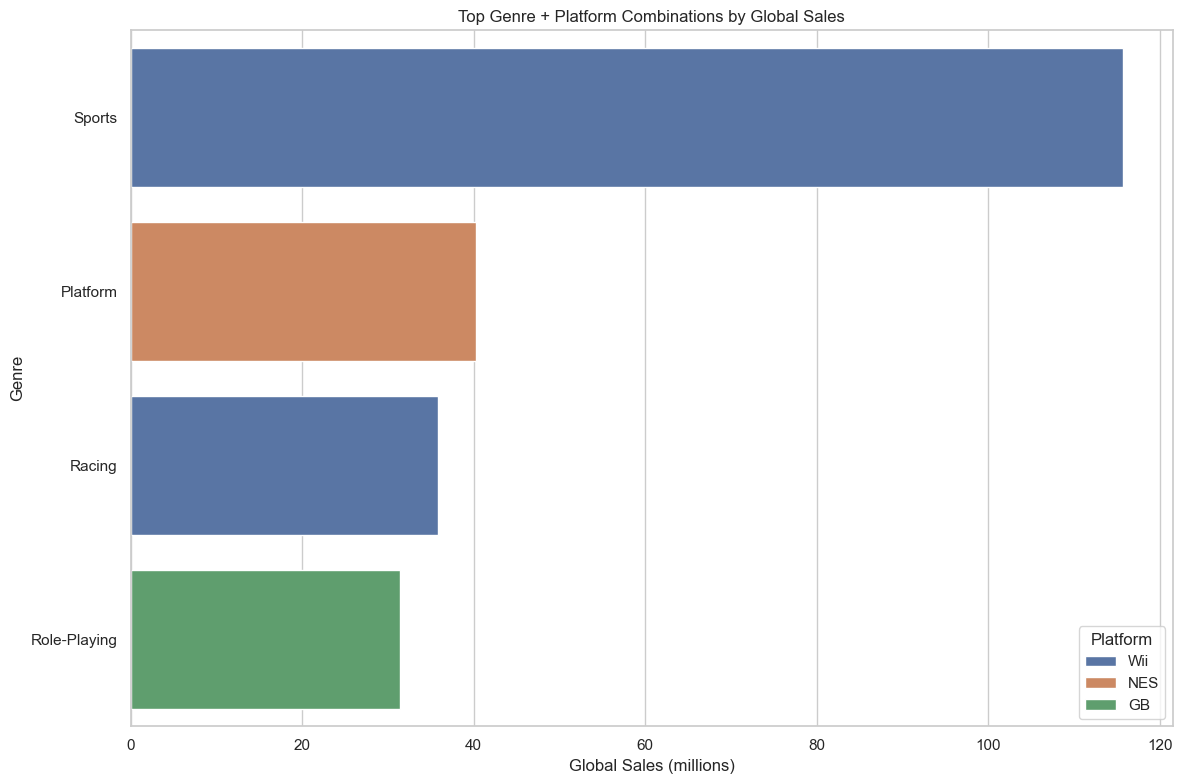

In [125]:
# 29. Top performing Genre + Platform combinations
combo = merged_df.groupby(['Genre', 'Platform'])['Global_Sales'].sum().reset_index()
top_combo = combo.sort_values(by='Global_Sales', ascending=False).head(15)
plt.figure(figsize=(12,8))
sns.barplot(data=top_combo, x='Global_Sales', y='Genre', hue='Platform')
plt.title("Top Genre + Platform Combinations by Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

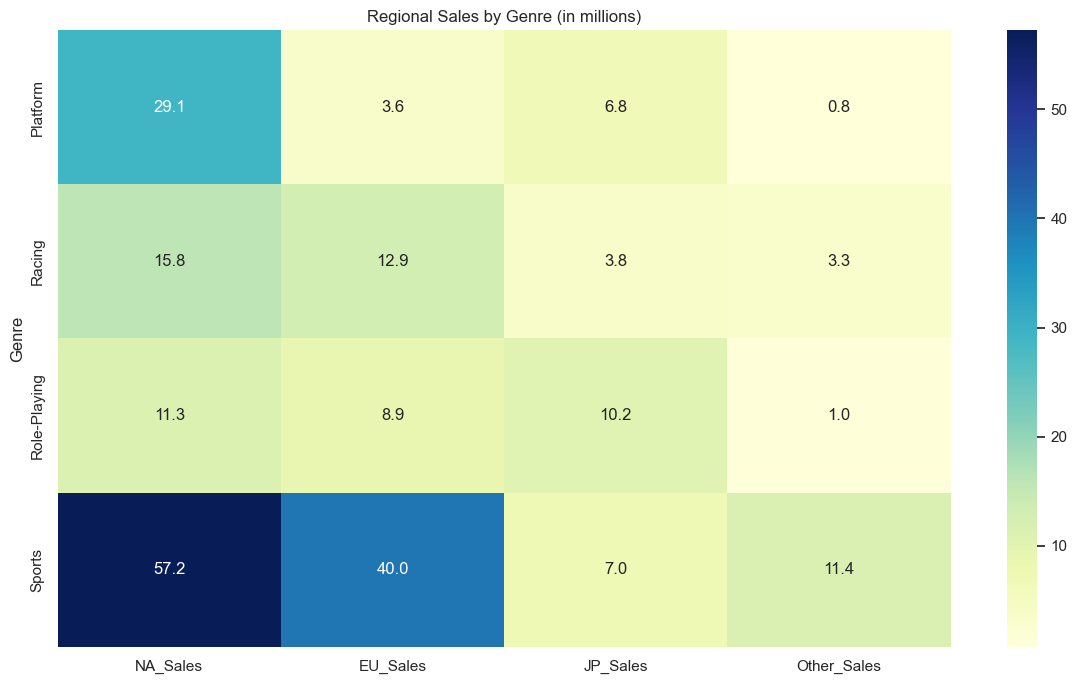

In [127]:
# 30. Regional sales heatmap by genre
region_sales = merged_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
plt.figure(figsize=(12,7))
sns.heatmap(region_sales, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Regional Sales by Genre (in millions)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [ ]:
conn.close()